# About Dataset
Data Science Job Salaries Dataset contains 11 columns, each are:
work_year: The year the salary was paid.
experience_level: The experience level in the job during the year
employment_type: The type of employment for the role
job_title: The role worked in during the year.
salary: The total gross salary amount paid.
salary_currency: The currency of the salary paid as an ISO 4217 currency code.
salaryinusd: The salary in USD
employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
remote_ratio: The overall amount of work done remotely
company_location: The country of the employer's main office or contracting branch
company_size: The median number of people that worked for the company during the year

In [1]:
# Install and import the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data set
data=pd.read_csv('spotify_dataset.csv')
#visualize the top five rows in the data using the head function
data.head()

Index  Highest Charting Position  Number of Times Charted  \
0      1                          1                        8   
1      2                          2                        3   
2      3                          1                       11   
3      4                          3                        5   
4      5                          5                        1   

  Week of Highest Charting                          Song Name   Streams  \
0   2021-07-23--2021-07-30                            Beggin'  48633449   
1   2021-07-23--2021-07-30          STAY (with Justin Bieber)  47248719   
2   2021-06-25--2021-07-02                           good 4 u  40162559   
3   2021-07-02--2021-07-09                         Bad Habits  37799456   
4   2021-07-23--2021-07-30  INDUSTRY BABY (feat. Jack Harlow)  33948454   

           Artist  Artist Followers                 Song ID  \
0        Måneskin         3377762.0  3Wrjm47oTz2sjIgck11l5e   
1   The Kid LAROI         2230022.0  5HCyWlXZPP0y6Gqq8TgA20   
2  Olivia Rodrigo         6266514.0  4ZtFanR9U6ndgddUvNcjcG   
3      Ed Sheeran        83293380.0  6PQ88X9TkUIAUIZJHW2upE   
4       Lil Nas X         5473565.0  27NovPIUIRrOZoCHxABJwK   

                                    Genre  ... Danceability Energy  Loudness  \
0  ['indie rock italiano', 'italian pop']  ...          0.7    0.8     -4.81   
1                  ['australian hip hop']  ...          0.6    0.8     -5.48   
2                                 ['pop']  ...          0.6    0.7     -5.04   
3                       ['pop', 'uk pop']  ...          0.8    0.9     -3.71   
4           ['lgbtq+ hip hop', 'pop rap']  ...          0.7    0.7     -7.41   

   Speechiness  Acousticness  Liveness   Tempo  Duration(ms)  Valence  Chord  
0         0.05          0.13      0.36  134.00      211560.0     0.59      B  
1         0.05          0.04      0.10  169.93      141806.0     0.48  C#/Db  
2         0.15          0.34      0.08  166.93      178147.0     0.69      A  
3         0.03          0.05      0.36  126.03      231041.0     0.59      B  
4         0.06          0.02      0.05  150.00      212000.0     0.89  D#/Eb  

[5 rows x 23 columns]

In [3]:
# add column about correlation between valence and danceability to see how joyful the song is 
data["Joyfulness"] = data["Valence"] + data["Danceability"]

In [4]:
# stream - artist followers = new column to show how new a popular artist is.
data["Popularity"] = data["Streams"] - data["Artist Followers"]

In [5]:
data.shape

(1556, 24)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      1556 non-null   int64  
 1   Highest Charting Position  1556 non-null   int64  
 2   Number of Times Charted    1556 non-null   int64  
 3   Week of Highest Charting   1556 non-null   object 
 4   Song Name                  1556 non-null   object 
 5   Streams                    1556 non-null   int64  
 6   Artist                     1556 non-null   object 
 7   Artist Followers           1545 non-null   float64
 8   Song ID                    1545 non-null   object 
 9   Genre                      1545 non-null   object 
 10  Release Date               1545 non-null   object 
 11  Weeks Charted              1556 non-null   object 
 12  Popularity                 1545 non-null   float64
 13  Danceability               1545 non-null   float

In [7]:
#Checking the null values in the data 
data.isna().sum().sort_values(ascending=False)

Popularity                   11
Danceability                 11
Chord                        11
Valence                      11
Duration(ms)                 11
Tempo                        11
Liveness                     11
Acousticness                 11
Speechiness                  11
Loudness                     11
Energy                       11
Joyfulness                   11
Release Date                 11
Genre                        11
Song ID                      11
Artist Followers             11
Highest Charting Position     0
Weeks Charted                 0
Artist                        0
Streams                       0
Song Name                     0
Week of Highest Charting      0
Number of Times Charted       0
Index                         0
dtype: int64

In [8]:
# making new data frame with dropped NA values  
new_data = data.dropna(axis = 0, how = 'any')  

In [9]:
print("Old data frame length:", len(data)) 
print("New data frame length:", len(new_data))  
print("Number of rows with at least 1 NA value: ", 
      (len(data)-len(new_data)))

Old data frame length: 1556
New data frame length: 1545
Number of rows with at least 1 NA value:  11


In [10]:
# Understanding the Stastics in the data set
new_data.describe()

Index  Highest Charting Position  Number of Times Charted  \
count  1545.000000                1545.000000              1545.000000   
mean    779.135922                  87.825243                10.684142   
std     449.593861                  58.132046                16.389761   
min       1.000000                   1.000000                 1.000000   
25%     389.000000                  37.000000                 1.000000   
50%     780.000000                  80.000000                 4.000000   
75%    1169.000000                 137.000000                12.000000   
max    1556.000000                 200.000000               142.000000   

            Streams  Artist Followers    Popularity  Danceability  \
count  1.545000e+03      1.545000e+03  1.545000e+03   1545.000000   
mean   6.337136e+06      1.471690e+07 -8.379766e+06      0.696570   
std    3.375402e+06      1.667579e+07  1.666889e+07      0.144618   
min    4.176083e+06      4.883000e+03 -7.852399e+07      0.200000   
25%    4.915080e+06      2.123734e+06 -1.712046e+07      0.600000   
50%    5.269163e+06      6.852509e+06 -1.489556e+06      0.700000   
75%    6.452492e+06      2.269875e+07  3.526664e+06      0.800000   
max    4.863345e+07      8.333778e+07  4.525569e+07      1.000000   

            Energy     Loudness  Speechiness  Acousticness     Liveness  \
count  1545.000000  1545.000000  1545.000000   1545.000000  1545.000000   
mean      0.637994    -6.349036     0.123858      0.248841     0.181353   
std       0.163827     2.509481     0.110512      0.250551     0.144262   
min       0.100000   -25.170000     0.020000      0.000000     0.020000   
25%       0.500000    -7.490000     0.050000      0.050000     0.100000   
50%       0.600000    -5.990000     0.080000      0.160000     0.120000   
75%       0.800000    -4.710000     0.170000      0.390000     0.220000   
max       1.000000     1.510000     0.880000      0.990000     0.960000   

             Tempo   Duration(ms)      Valence   Joyfulness  
count  1545.000000    1545.000000  1545.000000  1545.000000  
mean    122.811502  197940.816828     0.515061     1.211631  
std      29.591024   47148.930420     0.227472     0.309915  
min      46.720000   30133.000000     0.030000     0.260000  
25%      97.960000  169266.000000     0.340000     1.000000  
50%     122.010000  193591.000000     0.510000     1.230000  
75%     143.860000  218902.000000     0.690000     1.430000  
max     205.270000  588139.000000     0.980000     1.970000

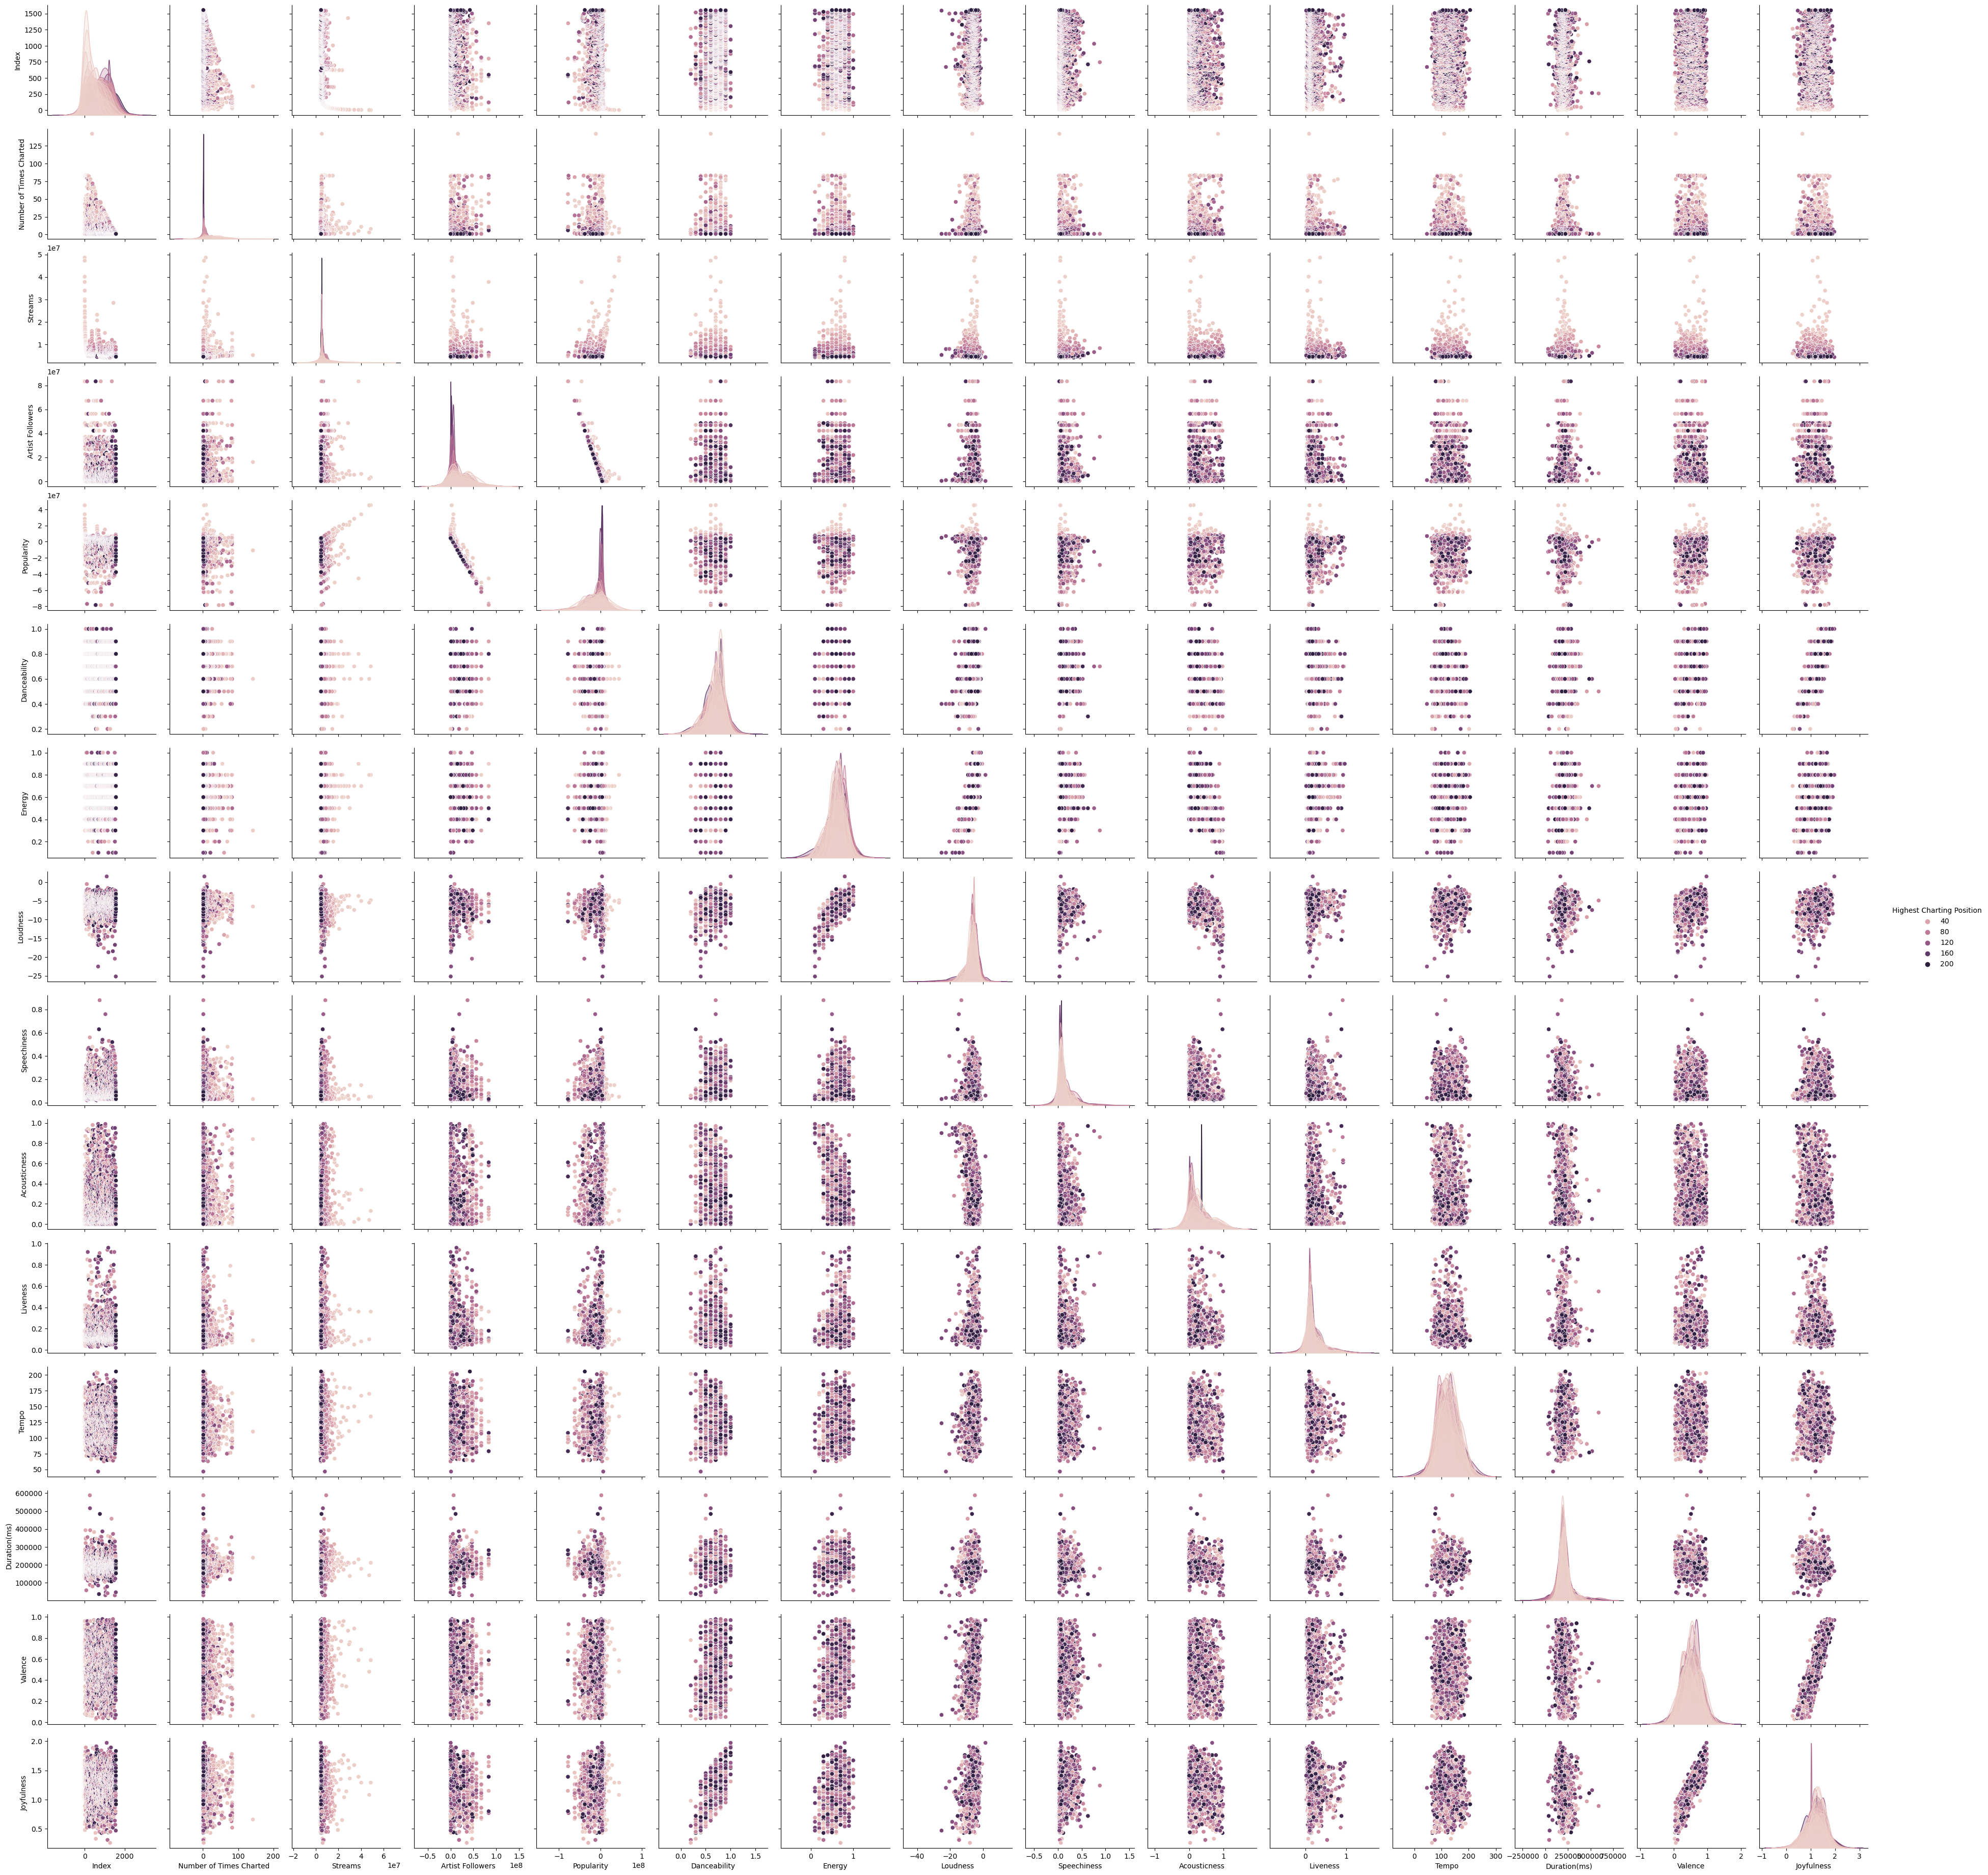

In [12]:
sns.pairplot(new_data, hue = 'Highest Charting Position')
plt.show()